# Question 1: **Find Cosine Similarity (Marks = 10)**
Two images are given having dimensions of 200×200×3. You are tasked to find the cosine similarity between two. Do not use any built in functions. (Write the code from scratch.)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

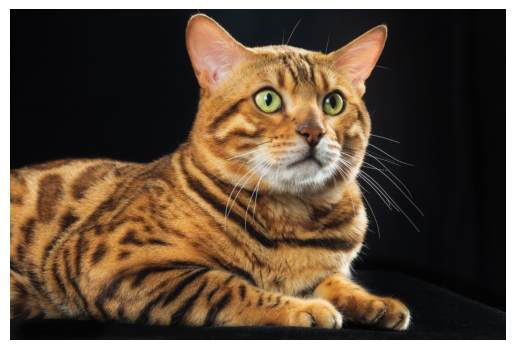

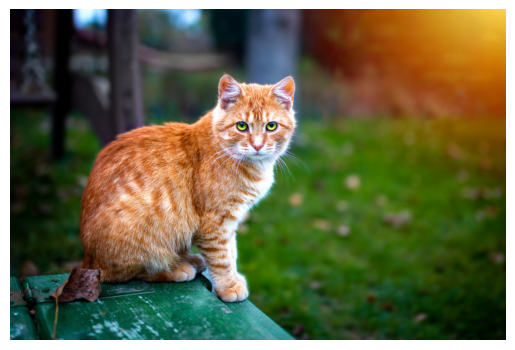

In [18]:
# Read two 1000x667 RGB images
image1 = cv2.imread("img_cat.jpg")
image2 = cv2.imread("img_cat1.jpg")

plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [6]:
def cosine_similarity(image1, image2):
    # images into 1D arrays
    image1_flat = image1.flatten()
    image2_flat = image2.flatten()

    # dot product
    dot = np.sum(image1_flat * image2_flat)

    # magnitudes of the vectors
    mag1 = np.sqrt(np.sum(image1_flat**2))
    mag2 = np.sqrt(np.sum(image2_flat**2))

    if mag1 == 0 or mag2 == 0:
        return 0  # avoid division by zero

    similarity = dot / (mag1 * mag2)

    return similarity

# 200x200
image1_resized = cv2.resize(image1, (200, 200))
image2_resized = cv2.resize(image2, (200, 200))

# cosine similarity
similarity = cosine_similarity(image1_resized, image2_resized)
print(f"Cosine Similarity: {similarity}")

Cosine Similarity: 1.15324135238182


# Question 2: **Apply following image processing functions(Marks = 10)**
a) Define a kernel and Apply edge detection algorithm on the image 1 and display it (Marks = 5) <br>
b) Compute the histogram(Blue+Green) of Image 1 and visualize them (Marks = 5)

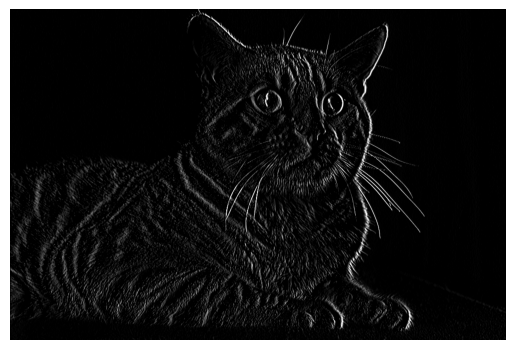

In [20]:
# a) define kernel and apply edge detection on image1
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# kernel
ke = np.array(
    [[1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]])

# edge detection
edge_image = cv2.filter2D(gray_image1, -1, ke)
plt.imshow(cv2.cvtColor(edge_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

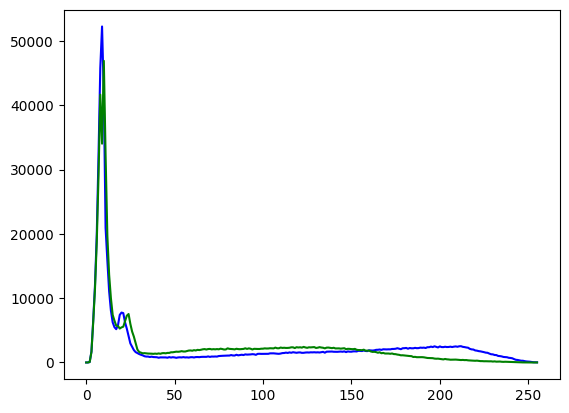

In [21]:
# b) compute histogram (blue+green)
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# hist
# hist_red = cv2.calcHist([image1_rgb], [2], None, [256], [0, 256])
hist_green = cv2.calcHist([image1_rgb], [1], None, [256], [0, 256])
hist_blue = cv2.calcHist([image1_rgb], [0], None, [256], [0, 256])
# visualize
plt.plot(hist_blue, color='blue')
plt.plot(hist_green, color='green')
plt.show()

In [17]:
help(cv2.calcHist)

Help on built-in function calcHist:

calcHist(...)
    calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
    .   @overload
    .   
    .   this variant supports only uniform histograms.
    .   
    .   ranges argument is either empty vector or a flattened vector of histSize.size()*2 elements
    .   (histSize.size() element pairs). The first and second elements of each pair specify the lower and
    .   upper boundaries.



In [22]:
help(cv2.filter2D)

Help on built-in function filter2D:

filter2D(...)
    filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst
    .   @brief Convolves an image with the kernel.
    .   
    .   The function applies an arbitrary linear filter to an image. In-place operation is supported. When
    .   the aperture is partially outside the image, the function interpolates outlier pixel values
    .   according to the specified border mode.
    .   
    .   The function does actually compute correlation, not the convolution:
    .   
    .   \f[\texttt{dst} (x,y) =  \sum _{ \substack{0\leq x' < \texttt{kernel.cols}\\{0\leq y' < \texttt{kernel.rows}}}}  \texttt{kernel} (x',y')* \texttt{src} (x+x'- \texttt{anchor.x} ,y+y'- \texttt{anchor.y} )\f]
    .   
    .   That is, the kernel is not mirrored around the anchor point. If you need a real convolution, flip
    .   the kernel using #flip and set the new anchor to `(kernel.cols - anchor.x - 1, kernel.rows -
    .   anchor.y - 1)`.
    